In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [25]:
data = datasets.load_digits()

X_data = data.images
y_data = data.target

print(data.images.shape)
print(y_data.shape)

X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))  # 3차원 ->4차원 왜 바꿈? , 칼라영상의 계산의 효율성을 위해
#원핫인코딩
y_data = to_categorical(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)#랜덤스테이트는 항상 동일한 난수를 생성

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 4차원이해하기
a = np.array([[1,2],[3,4],[5,6]])
print(a, a.shape)

b = a.reshape(3,2,1) #
print(b, b.shape)
b[0][0][0]

(1797, 8, 8)
(1797,)
(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)
[[1 2]
 [3 4]
 [5 6]] (3, 2)
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]] (3, 2, 1)


1

In [26]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), 
                 filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid')) 
# 커널사이즈(3x3)x필터수(10) + 필터수(10, 바이어스) = 100
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # 영상 중 가장 큰값


model.add(Flatten()) #1차원으로 변환

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 파라미터, (input*노드수) + 바이어스(노드수)

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 6, 6, 10)          100       
_________________________________________________________________
activation_16 (Activation)   (None, 6, 6, 10)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                4550      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

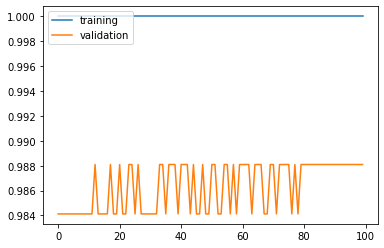

540/540 [==============================] - 0s 30us/step
Test accuracy:  0.9777777791023254


In [12]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

#단순 cnn조차 금방 96% 나온다.

In [13]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Flatten()) # 1차원으로 변환 
    model.add(Dense(50, activation = 'relu'))    
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [14]:
model = deep_cnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
activation_4 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
activation_5 (Activation)    (None, 4, 4, 50)         

In [15]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 21.1 s


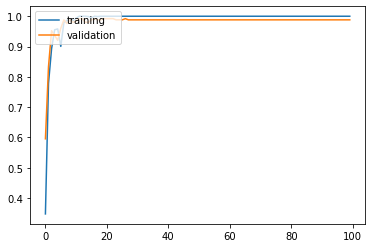

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## 2. Deep CNN - 2

In [18]:
#cnn 필터링할땐 드롭아웃 안씀
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    #필터 수 * 필터 
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    
    
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [19]:
model = deep_cnn_advanced()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_10 (Activation)   (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 50)         

In [20]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 29.9 s


In [21]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

540/540 [==============================] - 0s 105us/step
Test accuracy:  0.9629629850387573
